In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Step 1: Load dataset
file_path = r"\Users\hooda\Downloads\greendestination (1).csv"
df = pd.read_csv(file_path)

In [20]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [14]:
# Step 2: Data Preprocessing
# Convert Attrition to binary (Yes -> 1, No -> 0)
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [16]:
# Drop unnecessary columns
df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], inplace=True)

In [18]:
# Step 3: Calculate attrition rate
attrition_rate = df['Attrition'].mean() * 100
print(f"Attrition Rate: {attrition_rate:.2f}%")

Attrition Rate: 16.12%


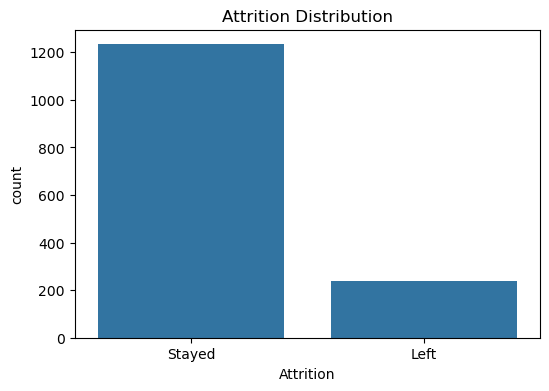

In [26]:
# Step 4: Exploratory Data Analysis (EDA)
##  Distribution of Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Attrition'])
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.title('Attrition Distribution')
plt.show()


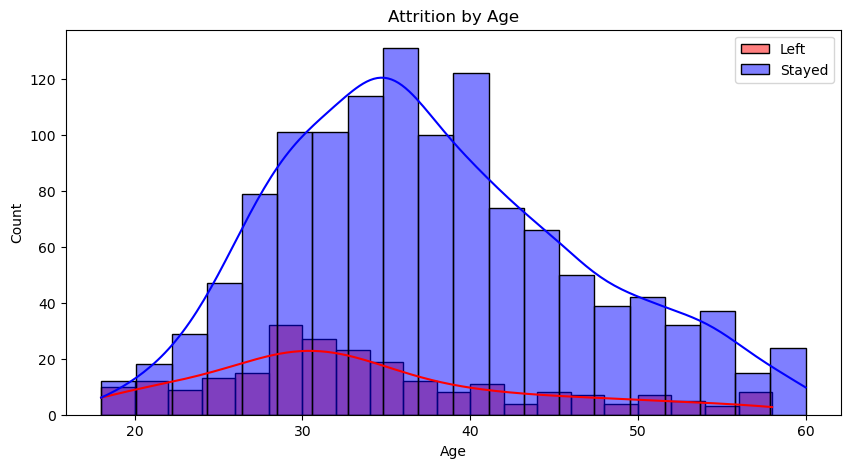

In [28]:
##  Attrition by Age
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Attrition'] == 1]['Age'], bins=20, kde=True, color='red', label='Left')
sns.histplot(df[df['Attrition'] == 0]['Age'], bins=20, kde=True, color='blue', label='Stayed')
plt.legend()
plt.title('Attrition by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

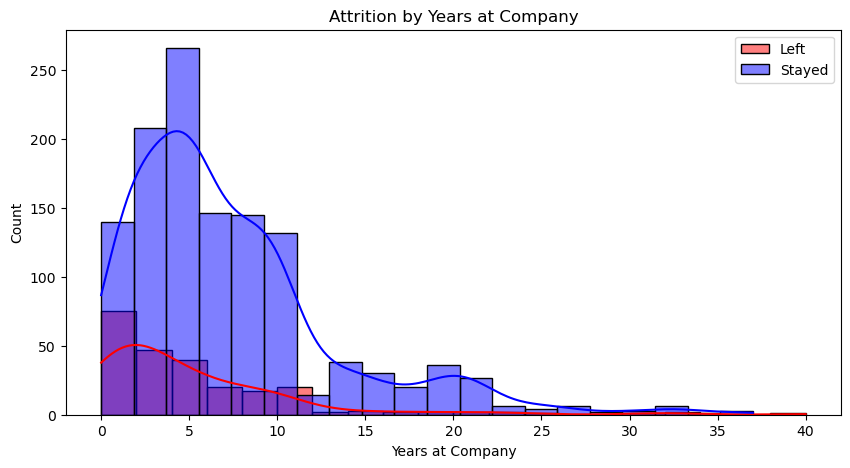

In [30]:
## Attrition by Years at Company
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Attrition'] == 1]['YearsAtCompany'], bins=20, kde=True, color='red', label='Left')
sns.histplot(df[df['Attrition'] == 0]['YearsAtCompany'], bins=20, kde=True, color='blue', label='Stayed')
plt.legend()
plt.title('Attrition by Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Count')
plt.show()

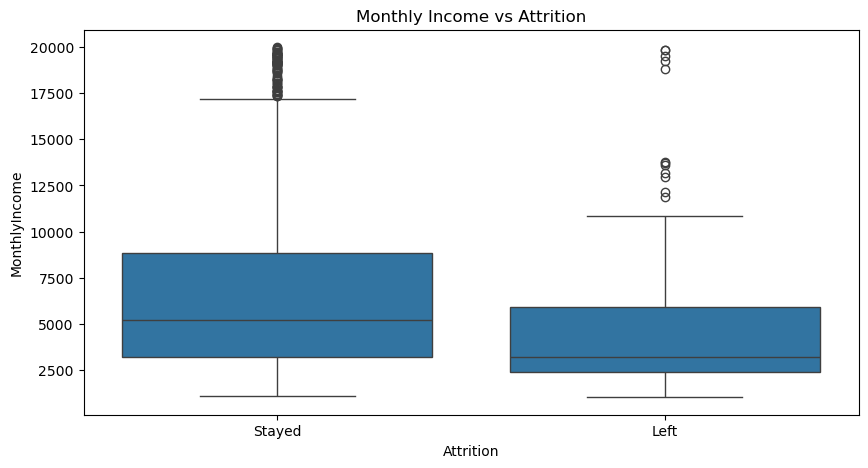

In [32]:
## Monthly Income vs Attrition
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Attrition'], y=df['MonthlyIncome'])
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.title('Monthly Income vs Attrition')
plt.show()

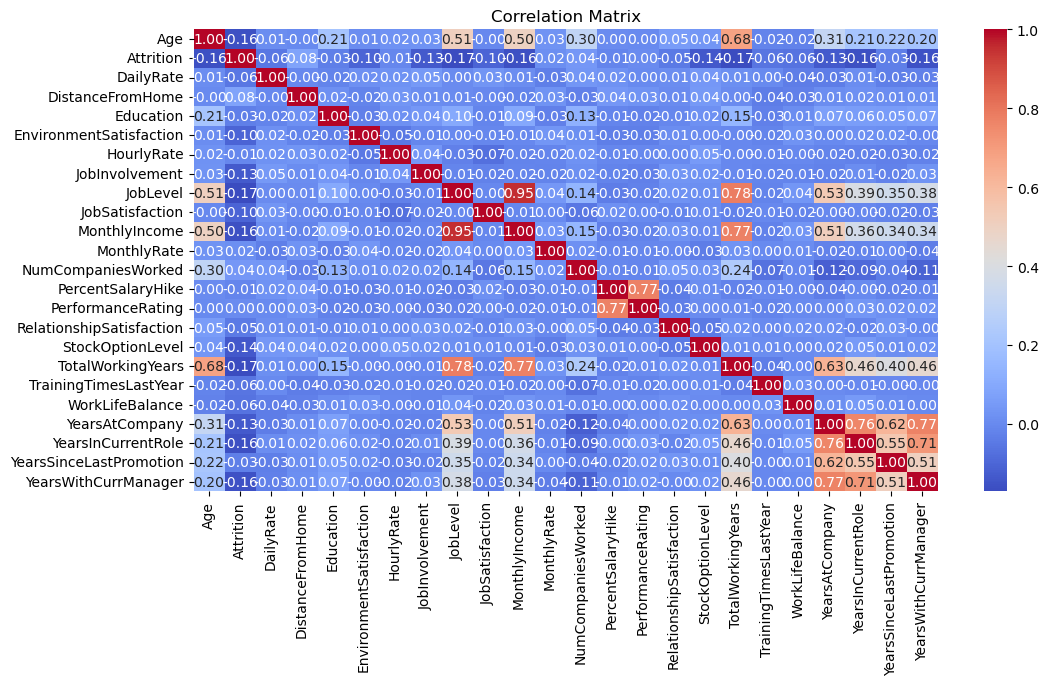

In [36]:
# Step 5: Correlation Analysis (Only numeric columns)
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

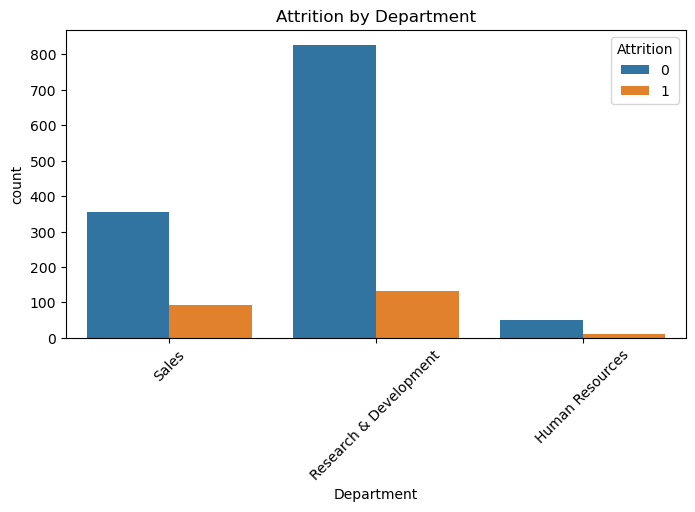

In [38]:
# Step 6: Attrition by Categorical Variables
## Attrition by Department
plt.figure(figsize=(8, 4))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()

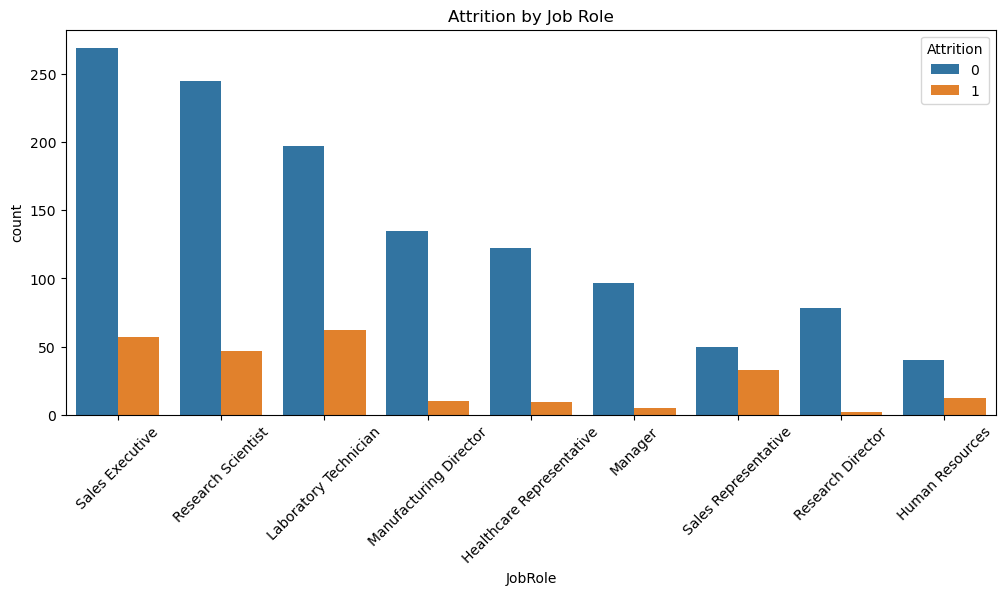

In [40]:
##  Attrition by Job Role
plt.figure(figsize=(12, 5))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title('Attrition by Job Role')
plt.xticks(rotation=45)
plt.show()

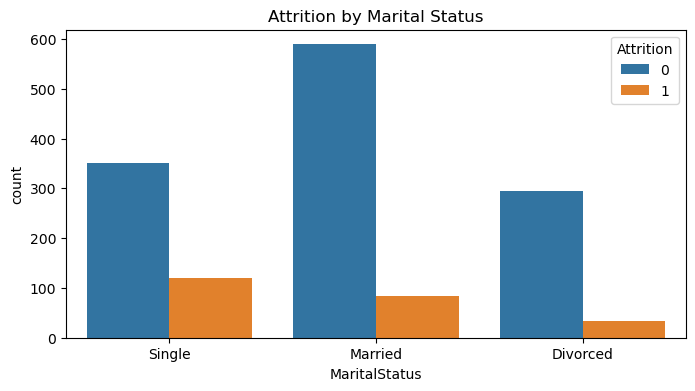

In [42]:
##  Attrition by Marital Status
plt.figure(figsize=(8, 4))
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.title('Attrition by Marital Status')
plt.show()

In [44]:
# Step 7: Save processed data
df.to_csv("processed_greendestination.csv", index=False)

Project Summary and Key Insights:
---------------------------------
1. Overall attrition rate is 16.12%, which indicates the proportion of employees who have left the company.
2. Age Distribution: Employees between the age group of 25 to 35 appear more likely to leave the organization.
3. Years at Company: Higher attrition is observed among employees with lower tenure (especially 0-3 years).
4. Monthly Income: Employees with lower monthly incomes show a higher tendency to leave, suggesting income may influence retention.
5. Correlation Insights: 'MonthlyIncome' and 'TotalWorkingYears' are moderately correlated, but neither has a strong correlation with attrition directly.
6. Department-wise Trends: The Sales and Research & Development departments show a higher number of employee exits compared to HR.
7. Job Role Analysis: Roles like 'Sales Executive' and 'Laboratory Technician' show relatively higher attrition rates.
8. Marital Status: Single employees have a noticeably higher attrition rate than those who are married or divorced.

These insights can help the HR team target retention strategies for at-risk groups based on age, tenure, income, and department.